# Data from a banking institution 

## Get Data

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('/Users/weiyiwang/code/TheWangAndOnly/Banking/Data/bank-full.csv')

### Is the data clean? 

In [3]:
data.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [6]:
data['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

<BarContainer object of 45211 artists>

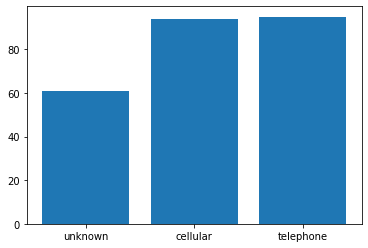

In [7]:
plt.bar(data['contact'], data['age'])

In [8]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

<BarContainer object of 45211 artists>

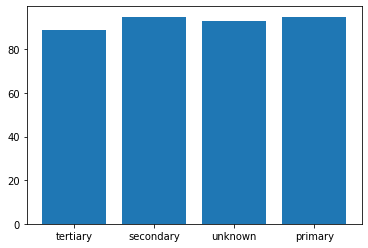

In [9]:
plt.bar(data['education'], data['age'])

In [10]:
data['duration'].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556])

In [11]:
data['Target'].unique()

array(['no', 'yes'], dtype=object)

In [16]:
def encoding_cat(data, *out):
    """This function converts all the categorical values of the DataFrame "data" into [0,1].
       It uses OneHotEncoder for multiple categorical values (>2)
       It uses LabelEncoder for binary categorical values
       - data: Pandas DataFrame
       - out: Columns of DataFrame that we don't want to convert
    """
    columns = data.keys()
    for col in columns:
        # Sometime not all the columns are need
        if col not in out:
            labels = list(data[col].unique())
            labels.sort()
            # Only with categorical values
            if isinstance(labels[0], str):
                if len(labels)>2:
                    ohe = OneHotEncoder(sparse=False)
                    data[labels]=ohe.fit_transform(data[[col]])
                    data.drop(columns=col, inplace=True)
                else:
                    le = LabelEncoder()
                    data[col]=le.fit_transform(data[col])
    return data

In [20]:
data = encoding_cat(data, 'month')

In [21]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplot()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [12]:
#data = data.replace('unknown', np.nan)
#data = data.dropna()